In [1]:
import os
from os import path

import json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
meta_dict = {}

for folder in os.listdir():
    if path.isdir(folder) and folder not in ['.ipynb_checkpoints', 'all_features']:
        for file in os.listdir(path.join(folder, 'original_files')):
            if file.rsplit(".")[-1] == 'json':
                with open(path.join(folder, 'original_files', file)) as json_file:
                    meta_dict[file.rsplit(".")[0]] = (json.load(json_file))
               

In [3]:
df = pd.read_pickle('dataframe_dropped.pkl')

In [4]:
df.sample(1)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,inertia_tensor_eigvals-2,local_centroid-0,max_intensity-0,...,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition
2173,94705.0,-1.0,0.446705,-14.299774,-13.180666,96.949489,490.576527,461.531886,6.197147,255.0,...,1.292103,0.336943,9.703135,25.355472,0.777555,0.433725,0.02777,0.01549,JC_Plate2_tnfa_low_77_nucleus_4,tnfa_low


In [5]:
def add_meta_data(row):
    filename = '_'.join(row.full_label.rsplit('_')[:-2])
    spy, spx = meta_dict[filename]['StagePosY'], meta_dict[filename]['StagePosX']
    row['StagePosX'] = np.float64(spx)
    row['StagePosY'] = np.float64(spy)
    return(row)


In [6]:
df = df.apply(add_meta_data, axis=1)

In [7]:
df.StagePosX

0       0.101692
1       0.101692
2       0.101692
3       0.101692
4       0.101692
          ...   
2412    0.046924
2413    0.046924
2414    0.046924
2415    0.045507
2416    0.045507
Name: StagePosX, Length: 2417, dtype: float64

In [8]:
df.sample(1)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,inertia_tensor_eigvals-2,local_centroid-0,max_intensity-0,...,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition,StagePosX,StagePosY
2048,77240.0,1.0,0.446226,-13.070694,2.357065,-11.296603,426.159371,425.217974,7.055351,255.0,...,9.550858,72.987271,0.540053,0.318639,0.028424,0.01677,JC_Plate2_BSA_57_nucleus_1,BSA,0.024445,0.011919


In [9]:
df.groupby('condition').describe()

convex_area                                                  \
                count           mean           std      min       25%   
condition                                                               
BSA             327.0   95618.232416  26863.369558  43600.0  73923.00   
Control         251.0   98889.278884  28017.797900  37787.0  77106.50   
both_high       281.0   92841.241993  28274.217555  45608.0  71055.00   
both_low        293.0  101645.662116  28773.026120  52595.0  79439.00   
mcp_high        329.0   97394.528875  28937.930928  44298.0  74942.00   
mcp_low         370.0   90804.556757  25835.327399  41075.0  72114.75   
tnfa_high       294.0   95057.251701  25493.549709  41563.0  74649.25   
tnfa_low        272.0   97940.283088  27235.330167  47934.0  77309.00   

                                        euler_number            ... StagePosX  \
               50%        75%       max        count      mean  ...       75%   
condition                                                       ...             
BSA        90461.0  115634.00  182135.0        327.0  0.804281  ...  0.023684   
Control    94065.0  115191.00  173627.0        251.0  0.760956  ...  0.024583   
both_high  85225.0  111787.00  174840.0        281.0  0.594306  ...  0.100912   
both_low   96019.0  122210.00  195433.0        293.0  0.846416  ...  0.102542   
mcp_high   92312.0  119691.00  188059.0        329.0  0.589666  ...  0.080108   
mcp_low    86923.0  108251.25  205068.0        370.0  0.756757  ...  0.079218   
tnfa_high  90765.0  113137.75  167279.0        294.0  0.765306  ...  0.051425   
tnfa_low   94177.0  118472.75  172629.0        272.0  0.794118  ...  0.047576   

                    StagePosY                                          \
                max     count      mean       std       min       25%   
condition                                                               
BSA        0.024499     327.0  0.012415  0.001070  0.010827  0.011448   
Control    0.025364     251.0  0.040391  0.000984  0.038525  0.039503   
both_high  0.102014     281.0  0.036905  0.000846  0.035577  0.036216   
both_low   0.103919     293.0  0.023888  0.000429  0.022668  0.023713   
mcp_high   0.081127     329.0  0.040063  0.001137  0.038460  0.039133   
mcp_low    0.081834     370.0  0.023476  0.000605  0.022034  0.023117   
tnfa_high  0.052418     294.0  0.041120  0.001041  0.039663  0.040265   
tnfa_low   0.048374     272.0  0.016463  0.001028  0.015047  0.015589   

                                         
                50%       75%       max  
condition                                
BSA        0.012398  0.013332  0.014530  
Control    0.040337  0.041195  0.042565  
both_high  0.036854  0.037521  0.038652  
both_low   0.023928  0.024088  0.024767  
mcp_high   0.039890  0.040986  0.042583  
mcp_low    0.023572  0.023982  0.024407  
tnfa_high  0.040942  0.041932  0.043715  
tnfa_low   0.016356  0.017159  0.019130  

[8 rows x 1312 columns]

In [10]:
def assign_bins(group):
    x_bins = pd.qcut(group['StagePosX'], q=3, labels=[1, 2, 3])
    y_bins = pd.qcut(group['StagePosY'], q=3, labels=[1, 2, 3])
    group['position'] = (x_bins.astype(str) + '-' + y_bins.astype(str)).astype(str)
    return group

df = df.groupby('condition').apply(assign_bins).reset_index(drop=True)

df.sample(10)

/tmp/ipykernel_31141/3768397341.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group['position'] = (x_bins.astype(str) + '-' + y_bins.astype(str)).astype(str)
/tmp/ipykernel_31141/3768397341.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group['position'] = (x_bins.astype(str) + '-' + y_bins.astype(str)).astype(str)
/tmp/ipykernel_31141/3768397341.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,inertia_tensor_eigvals-2,local_centroid-0,max_intensity-0,...,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition,StagePosX,StagePosY,position
990,65559.0,1.0,0.512527,1.557648,-4.372381,16.582168,504.825072,447.187617,5.571861,255.0,...,624.109569,1.194074,0.462905,0.132675,0.051434,JC_Plate2_both_low_43_nucleus_9,both_low,0.102299,0.023910,3-2
106,122420.0,1.0,0.519532,20.153049,-11.038893,2.215628,972.394821,617.390866,6.104804,255.0,...,2.748815,0.549726,0.169175,0.009995,0.003076,JC_Plate2_BSA_118_nucleus_2,BSA,0.021100,0.013655,1-3
341,59415.0,1.0,0.512735,-5.480708,-0.103097,-5.277303,370.907250,370.506056,6.009957,255.0,...,1152.075013,0.507752,0.547244,0.050775,0.054724,JC_Plate2_Control_71_nucleus_2,Control,0.024782,0.040640,3-2
342,77182.0,1.0,0.446535,16.343937,4.473890,77.782025,617.985212,393.016824,5.894193,255.0,...,111.504470,0.742132,0.242988,0.046383,0.015187,JC_Plate2_Control_71_nucleus_3,Control,0.024782,0.040640,3-2
92,87863.0,1.0,0.451374,-7.676046,-3.587856,-13.085742,587.010959,521.580126,6.249766,255.0,...,620.300579,1.043199,0.650204,0.080246,0.050016,JC_Plate2_BSA_65_nucleus_1,BSA,0.023068,0.012194,2-2
593,139896.0,1.0,0.467656,-5.324391,9.626083,128.136701,695.026426,555.538690,8.436002,255.0,...,99.552306,0.807290,0.498987,0.026042,0.016096,JC_Plate2_both_high_111_nucleus_2,both_high,0.099590,0.037908,1-3
1502,108210.0,1.0,0.501472,-1.153350,14.898254,-132.832299,635.735516,463.681001,7.791958,255.0,...,1078.932989,0.418951,0.084972,0.032227,0.006536,JC_Plate2_mcp_low_49_nucleus_4,mcp_low,0.077621,0.023483,1-2
543,116013.0,1.0,0.415586,25.078904,-0.410143,-69.586703,561.303356,539.077937,7.669256,255.0,...,58.213206,0.672963,0.356571,0.025883,0.013714,JC_Plate2_Control_120_nucleus_6,Control,0.024276,0.042398,2-3
1289,83737.0,1.0,0.523903,-10.515542,1.557187,-43.143431,484.910833,473.566127,5.570133,255.0,...,11.925944,0.627435,0.234688,0.016958,0.006343,JC_Plate2_mcp_high_73_nucleus_2,mcp_high,0.078350,0.039896,1-2
1511,110866.0,1.0,0.469561,8.359370,-10.422751,228.445062,824.705293,523.164078,5.828001,255.0,...,49.408603,0.720676,0.435659,0.028827,0.017426,JC_Plate2_mcp_low_119_nucleus_1,mcp_low,0.078569,0.024407,2-3


In [11]:
grouped = df.groupby('condition')

grouped.describe()

convex_area                                                  \
                count           mean           std      min       25%   
condition                                                               
BSA             327.0   95618.232416  26863.369558  43600.0  73923.00   
Control         251.0   98889.278884  28017.797900  37787.0  77106.50   
both_high       281.0   92841.241993  28274.217555  45608.0  71055.00   
both_low        293.0  101645.662116  28773.026120  52595.0  79439.00   
mcp_high        329.0   97394.528875  28937.930928  44298.0  74942.00   
mcp_low         370.0   90804.556757  25835.327399  41075.0  72114.75   
tnfa_high       294.0   95057.251701  25493.549709  41563.0  74649.25   
tnfa_low        272.0   97940.283088  27235.330167  47934.0  77309.00   

                                        euler_number            ... StagePosX  \
               50%        75%       max        count      mean  ...       75%   
condition                                                       ...             
BSA        90461.0  115634.00  182135.0        327.0  0.804281  ...  0.023684   
Control    94065.0  115191.00  173627.0        251.0  0.760956  ...  0.024583   
both_high  85225.0  111787.00  174840.0        281.0  0.594306  ...  0.100912   
both_low   96019.0  122210.00  195433.0        293.0  0.846416  ...  0.102542   
mcp_high   92312.0  119691.00  188059.0        329.0  0.589666  ...  0.080108   
mcp_low    86923.0  108251.25  205068.0        370.0  0.756757  ...  0.079218   
tnfa_high  90765.0  113137.75  167279.0        294.0  0.765306  ...  0.051425   
tnfa_low   94177.0  118472.75  172629.0        272.0  0.794118  ...  0.047576   

                    StagePosY                                          \
                max     count      mean       std       min       25%   
condition                                                               
BSA        0.024499     327.0  0.012415  0.001070  0.010827  0.011448   
Control    0.025364     251.0  0.040391  0.000984  0.038525  0.039503   
both_high  0.102014     281.0  0.036905  0.000846  0.035577  0.036216   
both_low   0.103919     293.0  0.023888  0.000429  0.022668  0.023713   
mcp_high   0.081127     329.0  0.040063  0.001137  0.038460  0.039133   
mcp_low    0.081834     370.0  0.023476  0.000605  0.022034  0.023117   
tnfa_high  0.052418     294.0  0.041120  0.001041  0.039663  0.040265   
tnfa_low   0.048374     272.0  0.016463  0.001028  0.015047  0.015589   

                                         
                50%       75%       max  
condition                                
BSA        0.012398  0.013332  0.014530  
Control    0.040337  0.041195  0.042565  
both_high  0.036854  0.037521  0.038652  
both_low   0.023928  0.024088  0.024767  
mcp_high   0.039890  0.040986  0.042583  
mcp_low    0.023572  0.023982  0.024407  
tnfa_high  0.040942  0.041932  0.043715  
tnfa_low   0.016356  0.017159  0.019130  

[8 rows x 1312 columns]

In [12]:
first_group_key = list(grouped.groups.keys())[0]
first_group = grouped.get_group(first_group_key)

first_group.sample(10)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,inertia_tensor_eigvals-2,local_centroid-0,max_intensity-0,...,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition,StagePosX,StagePosY,position
279,151358.0,1.0,0.503611,5.754853,2.489560,-120.814785,700.514729,652.350867,7.939824,255.0,...,252.629325,0.824134,0.449464,0.035832,0.019542,JC_Plate2_BSA_131_nucleus_1,BSA,0.022982,0.014068,2-3
307,116490.0,1.0,0.534901,-5.560669,19.404530,-74.753025,776.930314,572.212551,6.384585,255.0,...,7.841472,0.634209,0.226593,0.016690,0.005963,JC_Plate2_BSA_116_nucleus_2,BSA,0.020948,0.013573,1-3
224,77029.0,1.0,0.489719,2.487019,-6.997169,-21.811723,517.292624,512.511249,5.918384,255.0,...,35.968112,0.955977,0.369770,0.047799,0.018488,JC_Plate2_BSA_38_nucleus_1,BSA,0.022236,0.011520,2-1
90,137070.0,1.0,0.423346,-12.165973,-12.072215,-23.873086,757.904338,750.818863,8.612712,255.0,...,27.261524,0.679997,0.609259,0.017895,0.016033,JC_Plate2_BSA_83_nucleus_4,BSA,0.021176,0.012569,1-2
246,114810.0,1.0,0.530341,6.234562,-11.357919,27.187569,769.933174,641.390776,6.522415,255.0,...,49.477921,0.657948,0.254386,0.021224,0.008206,JC_Plate2_BSA_45_nucleus_1,BSA,0.021836,0.011761,1-1
153,77503.0,-2.0,0.481893,-3.931945,18.269591,-19.697680,615.200289,528.268819,5.690303,255.0,...,83.216794,0.966415,0.430923,0.048321,0.021546,JC_Plate2_BSA_14_nucleus_3,BSA,0.021625,0.011025,1-1
298,72181.0,1.0,0.525293,0.841886,4.337044,-47.041242,399.778247,382.296414,6.687880,255.0,...,13.374806,0.730797,0.391234,0.031774,0.017010,JC_Plate2_BSA_139_nucleus_1,BSA,0.023194,0.014416,2-3
169,77833.0,1.0,0.516166,-6.449805,-8.906442,68.231247,572.367862,386.729965,6.729529,255.0,...,13.625425,0.618122,0.271264,0.022076,0.009688,JC_Plate2_BSA_93_nucleus_3,BSA,0.023230,0.012831,2-2
195,60118.0,1.0,0.435071,16.029677,6.369146,-55.510926,358.348895,332.087801,6.229944,255.0,...,27.431617,0.745921,0.238411,0.037296,0.011921,JC_Plate2_BSA_0_nucleus_13,BSA,0.020959,0.010827,1-1
321,43600.0,1.0,0.539854,-2.989137,-2.199349,19.763126,353.247709,304.997018,4.946925,255.0,...,17841.481953,0.865836,0.727118,0.216459,0.181780,JC_Plate2_BSA_129_nucleus_1,BSA,0.023417,0.013931,3-3


In [13]:
df.to_pickle('dataframe_position.pkl')

<h4> Cluster analysis </h4>

In [14]:
df = pd.read_pickle('dataframe_position.pkl')

In [15]:
from sklearn.preprocessing import StandardScaler

positions = df['position']
conditions = df['condition']

columns = [col for col in df.columns if ('full_label' not in col and 'condition' not in col and 'StagePosX' not in col and 'StagePosY' not in col and 'position' not in col)]

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[columns]), columns=columns)

In [33]:
from sklearn.manifold import TSNE

# Create and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(df_normalized)

# Create DataFrame from t-SNE-transformed data
transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])


In [34]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), conditions.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,condition
0,-10.403567,-11.631176,BSA
1,20.523266,-0.559118,BSA
2,26.410524,-5.159282,BSA
3,-4.377142,-7.774973,BSA
4,28.604483,-3.520401,BSA
...,...,...,...
2412,-9.559753,1.406823,tnfa_low
2413,-10.096026,8.196815,tnfa_low
2414,-11.542948,-10.415112,tnfa_low
2415,-21.309046,-8.376153,tnfa_low


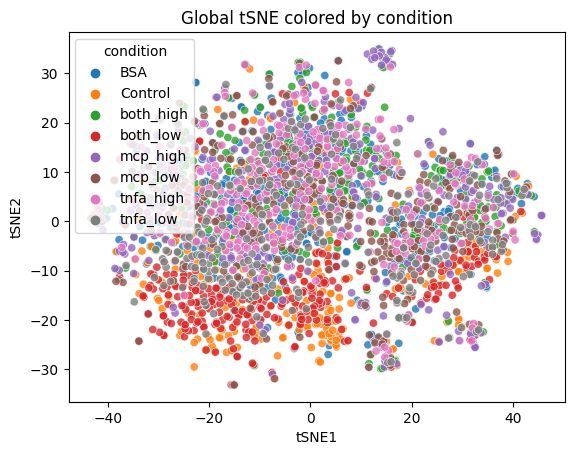

In [18]:
sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2', hue='condition', alpha = 0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('Global tSNE colored by condition')
plt.show()

In [40]:
shuffled_df = transformed_data_labeled.sample(frac=1).reset_index(drop=True)


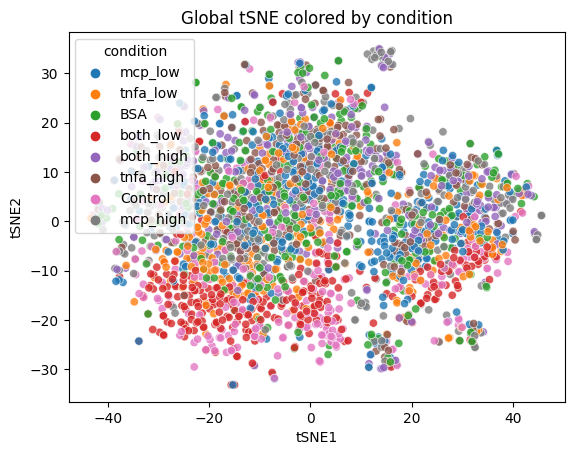

In [41]:
sns.scatterplot(data = shuffled_df, x = 'Component 1', y = 'Component 2', hue='condition', alpha = 0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('Global tSNE colored by condition')
plt.show()

In [43]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), positions.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,position
0,-10.403567,-11.631176,2-2
1,20.523266,-0.559118,2-2
2,26.410524,-5.159282,2-2
3,-4.377142,-7.774973,1-2
4,28.604483,-3.520401,1-2
...,...,...,...
2412,-9.559753,1.406823,2-1
2413,-10.096026,8.196815,2-1
2414,-11.542948,-10.415112,2-1
2415,-21.309046,-8.376153,1-3


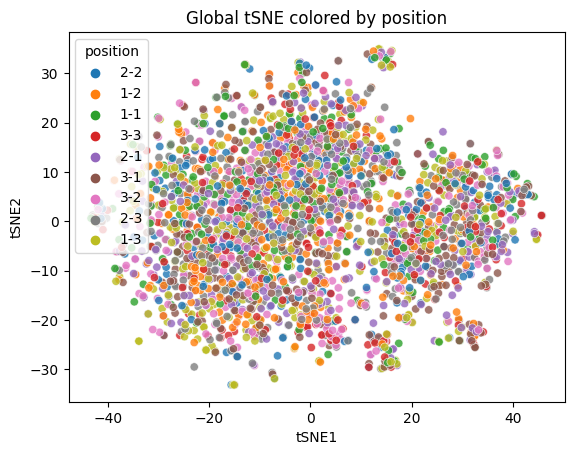

In [44]:
sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2', hue='position',alpha = 0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('Global tSNE colored by position')
plt.show()

In [45]:
shuffled_df = transformed_data_labeled.sample(frac=1).reset_index(drop=True)


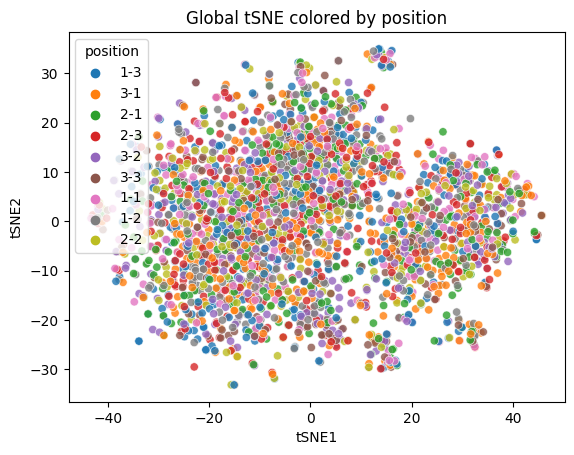

In [46]:
sns.scatterplot(data = shuffled_df, x = 'Component 1', y = 'Component 2', hue='position',alpha = 0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('Global tSNE colored by position')
plt.show()

In [25]:
def plot_cluster_check_for_condition(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.manifold import TSNE
    df = df.groupby('condition')
    for condition in df.groups.keys():
        df_condition = df.get_group(condition)
        
        positions = df_condition['position']
        conditions = df_condition['condition']
        
        columns = [col for col in df_condition.columns if ('full_label' not in col and 'condition' not in col and 'StagePosX' not in col and 'StagePosY' not in col and 'position' not in col)]
        
        scaler = StandardScaler()
        df_condition_normalized = pd.DataFrame(scaler.fit_transform(df_condition[columns]), columns=columns)

        tsne = TSNE(n_components=2, random_state=42)
        tsne_representation = tsne.fit_transform(df_condition_normalized)
        transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])

        transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), positions.reset_index(drop=True)], axis=1, ignore_index=False)
        sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2', hue='position')
        plt.xlabel('tSNE1')
        plt.ylabel('tSNE2')
        plt.title(condition)
        plt.show()
    

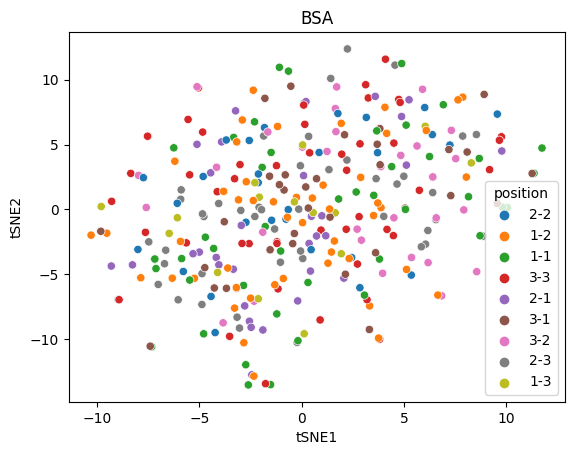

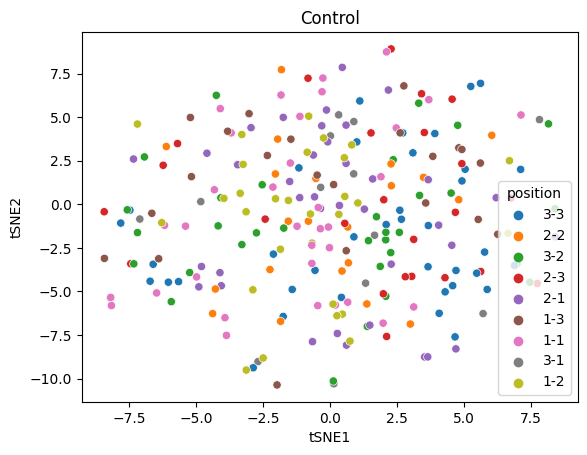

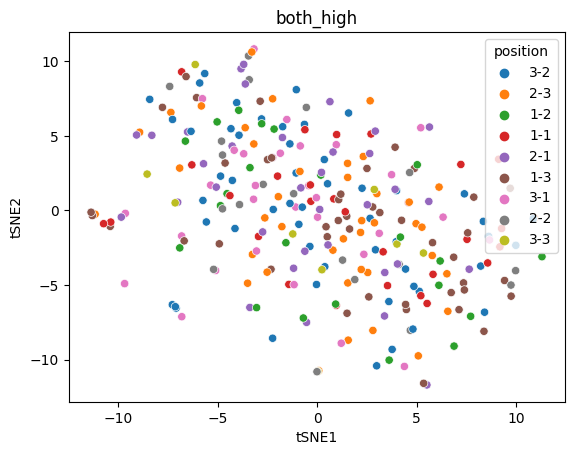

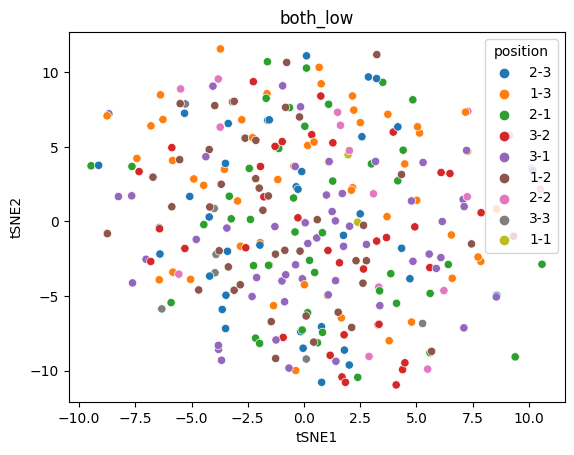

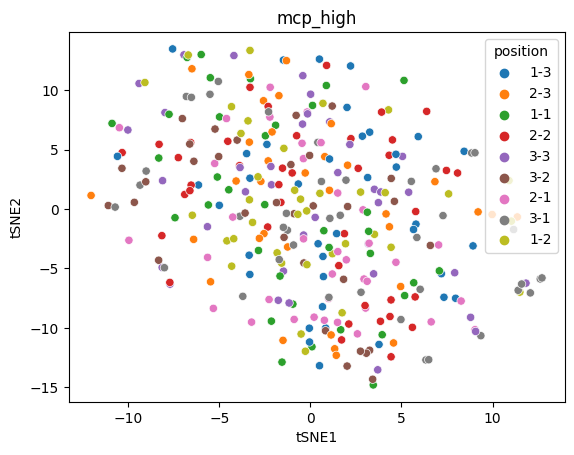

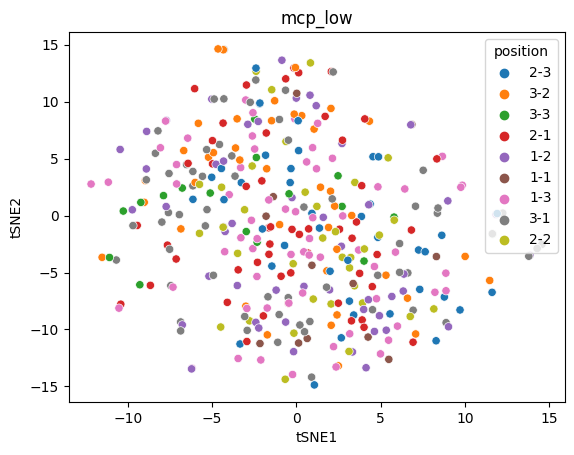

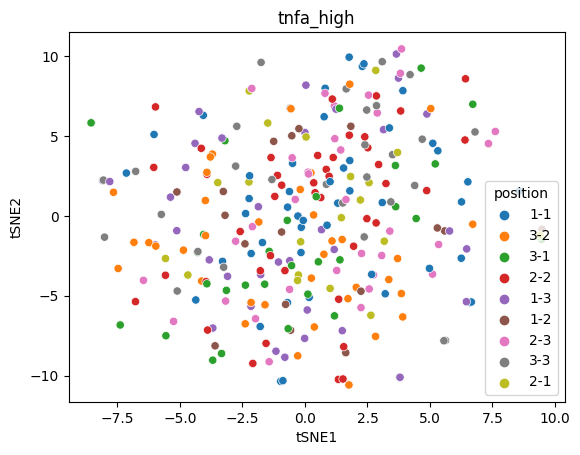

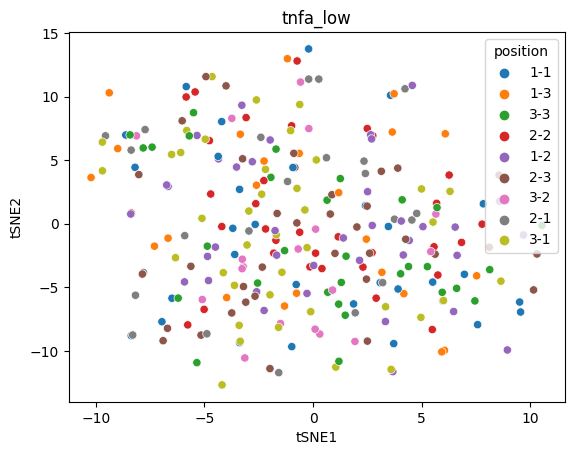

In [26]:
df = pd.read_pickle('dataframe_position.pkl')
plot_cluster_check_for_condition(df)

In [27]:
df = pd.read_pickle('dataframe_position.pkl')
for key in df.groupby('condition').groups.keys():
    print(key)

BSA
Control
both_high
both_low
mcp_high
mcp_low
tnfa_high
tnfa_low


<h5>PCA</h5>

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_normalized)
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_
transformed_data = pd.DataFrame(pca.transform(df_normalized))


In [29]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), df['condition'].reset_index()], axis=1, ignore_index=False)
transformed_data_labeled

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,index,condition
0,-0.634083,1.108050,1.808298,-1.209147,0.651500,-0.797417,-1.103292,-0.372504,-2.126791,-0.663870,...,-5.406963e-17,3.104840e-16,-1.845458e-16,-1.162874e-16,1.490557e-16,-2.359314e-16,-3.958242e-17,-4.945632e-16,0,BSA
1,2.388334,-1.684711,0.780287,0.305913,-0.460351,-0.151368,-2.251121,0.031282,-0.699687,-1.026131,...,-2.198401e-16,3.273368e-16,3.291230e-16,1.323335e-16,3.440838e-17,-3.767671e-16,3.691043e-16,-4.369725e-17,1,BSA
2,3.076083,-0.529043,4.759859,-0.194668,0.521872,1.719313,-1.235679,-1.012737,0.167950,0.070532,...,2.903893e-16,-1.757890e-15,1.218487e-16,1.156001e-17,1.390246e-16,1.035128e-15,-1.149529e-16,-1.167481e-17,2,BSA
3,1.365676,-0.507961,1.029810,-0.912148,0.488601,-0.460047,-2.152235,0.088174,1.253520,0.312049,...,-1.903034e-16,-8.277798e-17,-8.806015e-16,4.519109e-16,-2.858865e-16,5.870788e-17,2.607593e-16,-6.725666e-16,3,BSA
4,3.102154,-1.668609,0.986649,-0.912123,0.829597,-0.468540,-0.942211,-0.424853,-0.073361,1.156514,...,2.346438e-16,-4.810480e-16,1.338855e-16,-4.149525e-17,4.370859e-17,-1.007741e-16,2.792231e-16,1.536245e-16,4,BSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,-1.709757,-0.617550,1.045705,0.683160,0.009146,0.415444,0.038786,-0.620231,-1.256801,-1.233364,...,1.325890e-16,1.882220e-16,7.586981e-16,-3.631965e-16,7.546460e-17,-4.541759e-16,-5.762102e-17,1.901029e-17,2412,tnfa_low
2413,-3.185115,-0.470201,0.060197,-0.060124,-0.413844,-0.324210,1.313754,-1.076494,-1.208926,0.157607,...,7.798027e-16,-6.697913e-16,5.281980e-16,2.157853e-16,-1.984788e-16,1.238238e-15,6.370145e-17,2.437675e-16,2413,tnfa_low
2414,-1.846712,-1.526874,3.954349,-1.254668,1.382215,-0.066077,-3.030668,-1.236229,0.358827,0.364122,...,7.526268e-16,4.558257e-16,1.063990e-15,3.271823e-16,3.800310e-16,-5.269819e-17,6.171945e-17,7.668749e-16,2414,tnfa_low
2415,-5.030846,1.682154,-0.464002,-2.862699,-0.894994,-1.500775,-2.316371,1.701880,0.652885,-1.506923,...,-4.163177e-17,-8.422535e-16,1.114705e-17,3.438697e-16,-2.467368e-16,1.254759e-16,-4.538963e-16,-6.233954e-16,2415,tnfa_low


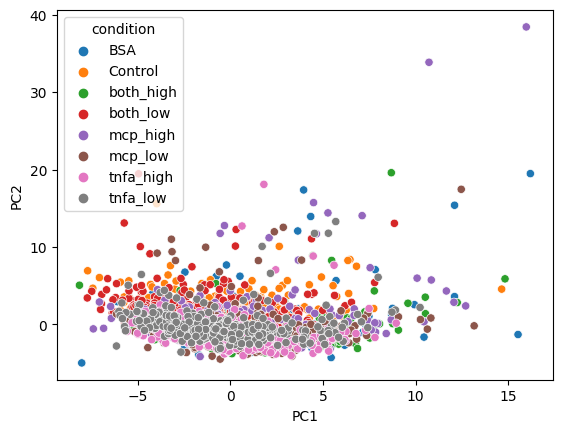

In [30]:
sns.scatterplot(data = transformed_data_labeled, x = 0, y = 1, hue='condition')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [31]:
shuffled_df = transformed_data_labeled.sample(frac=1).reset_index(drop=True)


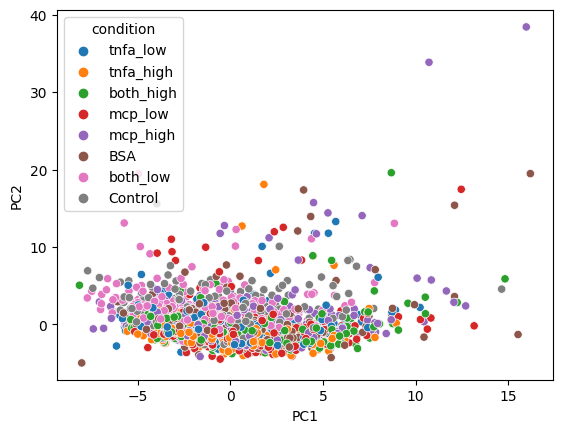

In [32]:
sns.scatterplot(data = shuffled_df, x = 0, y = 1, hue='condition')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()